# Metabolome Wide Association Studies

The method is to 

- test association of each metabolite feature to a phenotype (e.g. disease outcome). This can be done by group comparison (e.g. Student t-test to compare two groups).

- In population studies, confounders have to be accounted for. Therefore, regression models are used. For comparing two groups, we use logistic regression. For testing association with a continuous variable, we use linear regression.

There are multiple ways to perform regression using these "generalized linear models". Their Python implementations are explained here:

https://scikit-learn.org/stable/modules/linear_model.html

For this notebook, we use the simple OLS method but from `statsmodels` library.

The same task can be done more easily in R using the `lm` function.

Shuzhao Li, 2019-08-29


In [1]:
# import libraries

import pandas as pd
import numpy as np

import scipy.stats as stats

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1. Manhattan plots 

This uses the data file `testdata0710.txt` under the data/ folder, which is copied/cloned from

https://github.com/shuzhao-li/espol-workshop/tree/master/data


In [2]:
yfdata = pd.read_csv("data/testdata0710.txt", sep="\t")
print(yfdata.shape)
yfdata.head()

(7995, 5)


,m/z,retention_time,p-value,t-score,custom_id
0,85.0278,59,0.002657,-3.55,AE_pos_85.0278_59
1,85.0472,124,0.730810,-0.35,AE_pos_85.0472_124
2,85.0653,68,0.086509,1.83,AE_pos_85.0653_68
3,85.1007,16,0.057916,-2.04,AE_pos_85.1007_16
4,86.0595,67,0.076789,-1.89,AE_pos_86.0595_67


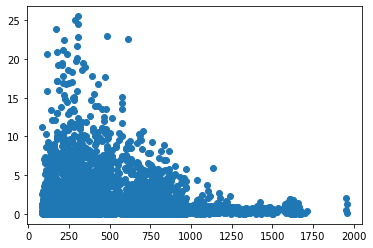

In [3]:
mz = list(yfdata["m/z"])

pval = list(yfdata["p-value"])

# do -log10 on p values

LGpval = [-np.log10(x) for x in pval]

# this makes Manhattan plot, -log10(p-value) vs mz
plt.scatter(mz, LGpval)

### Asignment

Modify the figure above to have the dots colored and sized.

Refer to the `simple_introduction` notebook we used on Tuesday.


## Exercise 2. Spearman rank correlation 

We will test the association of antibody response to metabolomic profile in the HZ vaccine study (Li et al., 2017. Cell 169:862).

The data were prepared for this exercise:
- HZ_antibody_day28v0.tsv
- HZ_metabolomics_day0.tsv

This is the simple correlation without considering confounders. To account for confounders, we will use linear regression in the next section.

In [4]:
# read antibody data
antibody = pd.read_csv("data/HZ_antibody_day28v0.tsv", sep="\t")
print(antibody.shape)
antibody

(70, 2)


,Unnamed: 0,IgG_D28/0
0,ZV1-01-d0,1.884605
1,ZV1-04-d0,0.393172
2,ZV1-05-d0,-0.168907
3,ZV1-06-d0,0.939257
4,ZV1-08-d0,0.886718
5,ZV1-09-d0,0.222364
6,ZV1-10-d0,1.197636
7,ZV1-11-d0,1.102782
8,ZV1-12-d0,0.762558
9,ZV1-13-d0,0.482860


In [5]:
# read data
metabo = pd.read_csv("data/HZ_metabolomics_day0.tsv", sep="\t")
print(metabo.shape)
metabo.head()

(2216, 71)


,vax05_pos_metabo_feature,ZV1-01-d0,ZV1-04-d0,ZV1-05-d0,ZV1-06-d0,ZV1-08-d0,ZV1-09-d0,ZV1-10-d0,ZV1-11-d0,ZV1-12-d0,...,ZV2-28-d0,ZV2-30-d0,ZV2-31-d0,ZV2-32-d0,ZV2-33-d0,ZV2-34-d0,ZV2-35-d0,ZV2-36-d0,ZV2-38-d0,ZV2-39-d0
0,row1_85.0402_51,22.210,23.310,22.698,23.231,22.304,22.186,23.323,22.486,22.735,...,21.452,21.895,21.317,21.713,22.043,22.087,21.810,21.527,20.847,21.305
1,row2_85.0654_82,23.101,22.825,23.485,22.524,23.333,23.378,23.444,22.106,23.020,...,22.823,23.433,22.952,22.712,22.450,21.679,22.439,22.313,22.776,22.615
2,row3_85.0653_321,23.027,23.129,22.897,23.409,18.569,22.007,22.547,23.140,22.368,...,21.885,21.409,21.623,21.996,21.864,21.730,22.509,21.798,20.727,22.302
3,row4_85.0766_39,21.302,21.094,21.491,21.440,21.933,21.950,21.961,21.947,21.635,...,21.383,21.751,21.360,21.607,21.494,21.267,21.710,21.563,23.126,21.158
4,row5_85.0766_557,22.990,23.521,23.071,22.370,22.819,23.517,23.076,23.228,23.179,...,22.633,22.591,22.359,22.559,22.559,21.301,22.514,22.224,22.058,22.540


In [8]:
# The order of subjects in the two tables were pre-matched

m1 = metabo.iloc[0, 1:]
ab = antibody['IgG_D28/0']
print(m1, ab)

# To compute Spearman rank correlation for one metabolite feature 
r,p = stats.spearmanr(m1, ab)
print("Spearman rank correlation coefficient %f, p-value %f" %(r, p))

ZV1-01-d0     22.21
ZV1-04-d0     23.31
ZV1-05-d0    22.698
ZV1-06-d0    23.231
ZV1-08-d0    22.304
              ...  
ZV2-34-d0    22.087
ZV2-35-d0     21.81
ZV2-36-d0    21.527
ZV2-38-d0    20.847
ZV2-39-d0    21.305
Name: 0, Length: 70, dtype: object 0     1.884605
1     0.393172
2    -0.168907
3     0.939257
4     0.886718
        ...   
65    0.269361
66    0.502491
67    0.649965
68    1.960953
69    0.196382
Name: IgG_D28/0, Length: 70, dtype: float64
Spearman rank correlation coefficient 0.031056, p-value 0.798557


In [9]:
# to loop through all metabolite features
rlist, plist = [], []   # these list will hold the values
for ii in range(2216):
    m = metabo.iloc[ii, 1:]
    r,p = stats.spearmanr(m, ab)
    rlist.append(r)
    plist.append(p)
    
print("Got lists", len(plist))

Got lists 2216


Text(0.5, 1.0, 'Spearman rank correlation')

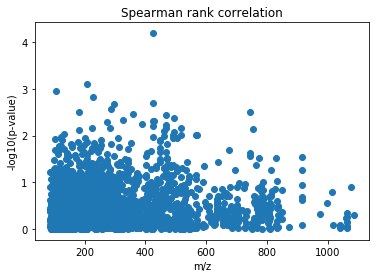

In [12]:
# Parsing out mz and retention time, as this table has a ID format row1_85.0402_51
# whereas 85.0402 is m/z, 51 is retention time in second

mzlist = [float(x.split("_")[1]) for x in metabo["vax05_pos_metabo_feature"]]
rtlist = [int(x.split("_")[2]) for x in metabo["vax05_pos_metabo_feature"]]

# Manhattan plot, using p-values from above Spearman rank correlation
LGpval2 = [-np.log10(x) for x in plist]

# this makes Manhattan plot, -log10(p-value) vs mz
plt.scatter(mzlist, LGpval2)
plt.xlabel("m/z")
plt.ylabel("-log10(p-value)")
plt.title("Spearman rank correlation")

## Exercise 3. Linear regression accounting for age and sex


